In [48]:
#importing google drvie into google collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
%cd /content/drive/MyDrive/ConceptAI/Assesment/

/content/drive/MyDrive/ConceptAI/Assesment


In [50]:
#checking the file directory
!ls

2408416_Shraddhey_Siddhi_Tuladhar.ipynb  south_asia_data.csv  WHR-2024-5CS037.csv


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [52]:
#reading the csv file World
df=pd.read_csv('WHR-2024-5CS037.csv')

In [53]:
#display the 10 first rows
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [54]:
#getting the number of rows and column
rows=df.shape[0]
print(f"Number of rows:{rows}")
column=df.shape[1]
print(f"Number of columns:{column}")

Number of rows:143
Number of columns:9


In [55]:
# display the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


In [56]:
#calculating the mean, median , standarad deviation of the Score column
mean=df['score'].mean()
median=df['score'].median()
std_dev=df['score'].std()

print(f"Mean Score:{mean}")
print(f"Median Score:{median}")
print(f"Standard Deviation Score:{std_dev}")

Mean Score:5.52758041958042
Median Score:5.785
Standard Deviation Score:1.1707165099442995


In [57]:
#identifying the country with highest and lowest happiness scores
highest_country_score=df.loc[df['score'].idxmax(),'Country name']
lowest_country_score=df.loc[df['score'].idxmin(),'Country name']

print(f"Country with the highest happiness  : {highest_country_score}")
print(f"Country with the lowest happiness  : {lowest_country_score}")

Country with the highest happiness  : Finland
Country with the lowest happiness  : Afghanistan


In [58]:
#check for the missing value
missing_value=df.isnull().sum()
print(missing_value)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [59]:
#Filter and Sorting
filter_df=df[df['score']>7.5]
filter_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [60]:
#Sort the dataset
sort_df=filter_df.sort_values(by=['Log GDP per capita'],ascending=False)

sort_df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [61]:
#adding new column to the dataframe
def happiness(score):
  if score<4:
    return 'Low'
  elif score <=6:
    return 'Medium'
  else:
    return 'High'

df['Happiness_Category']=df['score'].apply(happiness)
df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


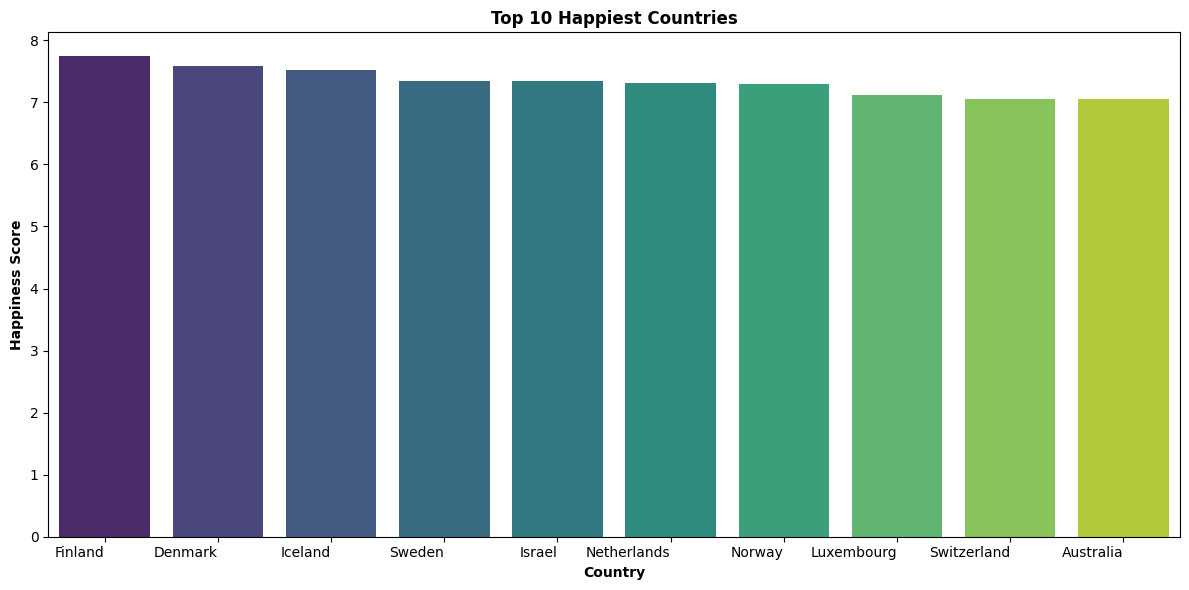

In [62]:
#Data Visualization

top_10=df.sort_values(by=['score'],ascending=False).head(10)


#plotting the bar graph using Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='Country name',y='score',data=top_10, palette='viridis',hue='Country name')
plt.title("Top 10 Happiest Countries", fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Happiness Score', fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

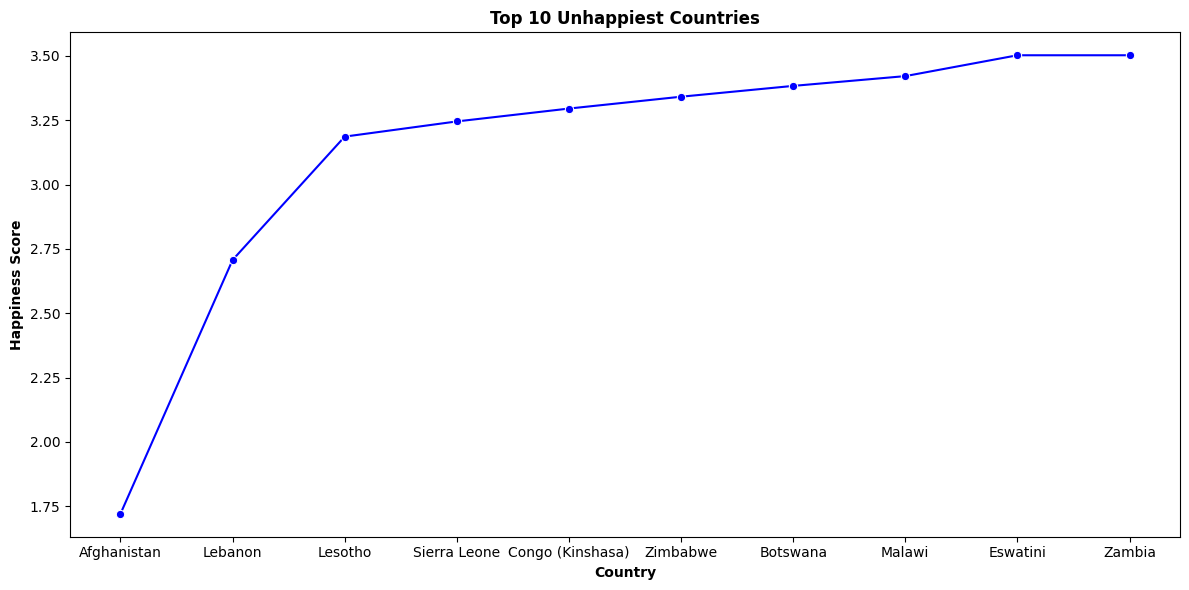

In [63]:
#Line plot of the unhappiest country
bottom_10=df.sort_values(by=['score'],ascending=True).head(10)

#Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Country name',y='score',data=bottom_10,marker='o',color='blue')
plt.title("Top 10 Unhappiest Countries", fontweight="bold")
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Happiness Score', fontweight='bold')
plt.tight_layout()
plt.show()

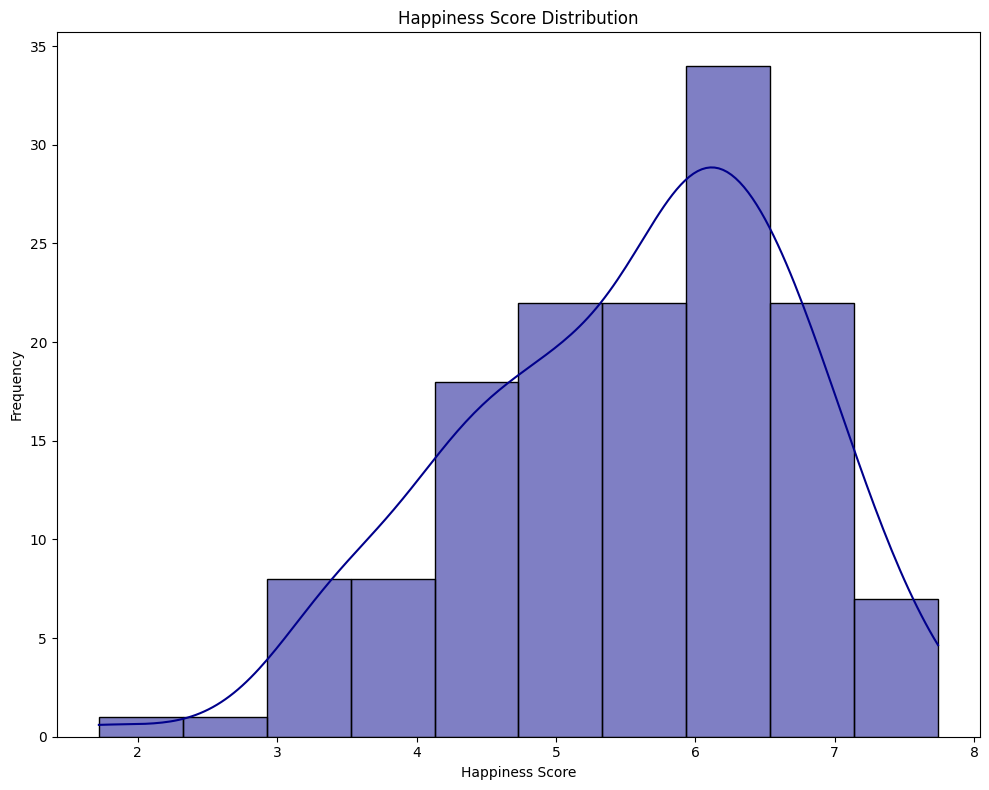

In [64]:
#Plotting a histogram

plt.figure(figsize=(10,8))
sns.histplot(df['score'], bins=10, kde=True, color='darkblue')
plt.title("Happiness Score Distribution")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

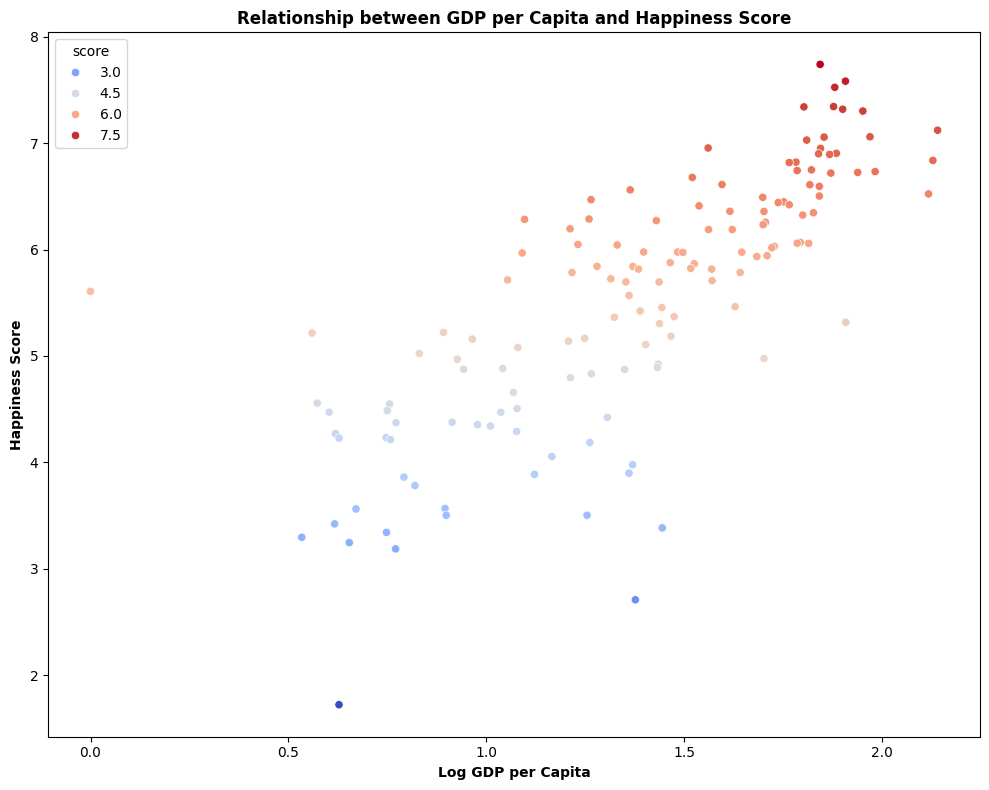

In [65]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=df,
    hue='score',
    palette='coolwarm'  # Adjust palette for clarity
)
plt.title("Relationship between GDP per Capita and Happiness Score", fontweight="bold")
plt.xlabel("Log GDP per Capita", fontweight="bold")
plt.ylabel("Happiness Score", fontweight="bold")

plt.tight_layout()
plt.show()


In [66]:
# list of South Asian Countries
south_asian = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_df=df[df['Country name'].isin(south_asian)]

south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [67]:
#Saving the filtered dataset in different CSV
south_asia_df.to_csv('south_asia_data.csv', index=False)

In [68]:

south_asia_df.loc[:,'Composite Score']= (
    0.40*south_asia_df['Log GDP per capita']+
    0.30*south_asia_df['Social support']+
    0.30*south_asia_df['Healthy life expectancy']
)

south_asia_df


<ipython-input-68-996e603c8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df.loc[:,'Composite Score']= (


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [69]:
#ranking the South Asian countries on composite score
south_asia_ranked=south_asia_df.sort_values(by=['Composite Score'],ascending=False)

south_asia_ranked[['Country name', 'Composite Score']]

,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


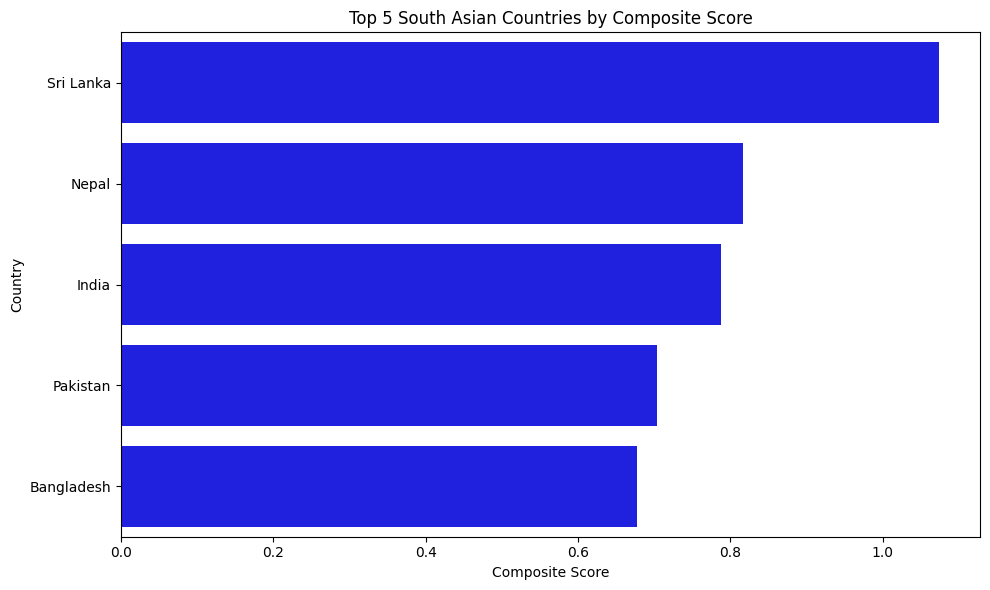

In [70]:
#Visualize top 5 countries

top_5=south_asia_ranked.head(5)


plt.figure(figsize=(10,6))
sns.barplot(x='Composite Score',y='Country name',data=top_5,orient='h',color='blue')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [71]:
#problem 4
#Comparison
comparison_df=south_asia_df[['Country name','score','Composite Score']]

comparison_df = comparison_df.sort_values(by=['Composite Score'],ascending=False)

comparison_df

,Country name,score,Composite Score
127,Sri Lanka,3.898,1.0739
92,Nepal,5.158,0.8159
125,India,4.054,0.7874
107,Pakistan,4.657,0.7039
128,Bangladesh,3.886,0.6774
142,Afghanistan,1.721,0.3238


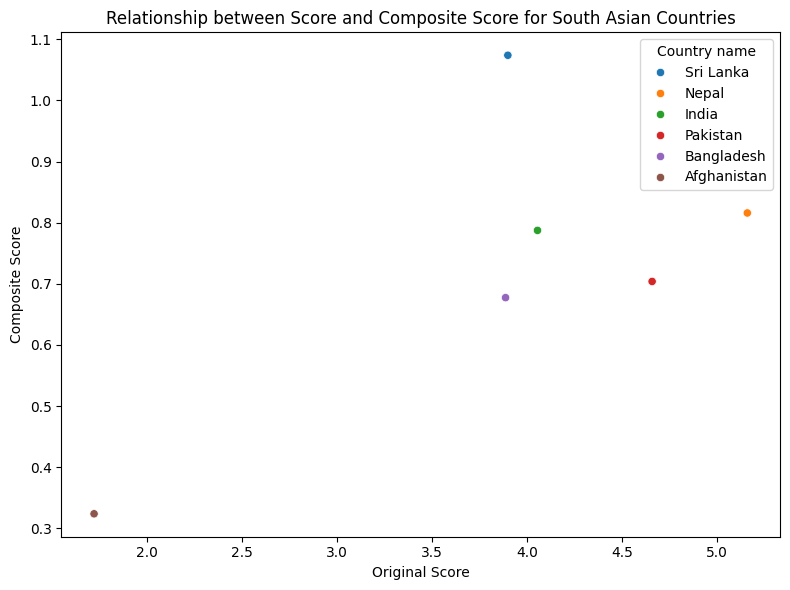

In [72]:
#Data Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='score',y='Composite Score', data=comparison_df,hue='Country name')
plt.title("Relationship between Score and Composite Score for South Asian Countries")
plt.xlabel("Original Score")
plt.ylabel("Composite Score")
plt.tight_layout()
plt.show()

In [73]:
#Identify outlier countries in South Asia based on Sore and GDP

Q1_score=south_asia_df['score'].quantile(0.25)
Q3_score=south_asia_df['score'].quantile(0.75)
IQR_score=Q3_score-Q1_score


Q1_gdp=south_asia_df['Log GDP per capita'].quantile(0.25)
Q3_gdp=south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp=Q3_gdp-Q1_gdp

upper_bound_score=Q3_score+1.5*IQR_score
lower_bound_score=Q1_score-1.5*IQR_score
upper_bound_gdp=Q3_gdp+1.5*IQR_gdp
lower_bound_gdp=Q1_gdp-1.5*IQR_gdp

#itendfiyng outliers
outliers=south_asia_df[
    (south_asia_df['score']>upper_bound_score) | (south_asia_df['score']<lower_bound_score) |
    (south_asia_df['Log GDP per capita']>upper_bound_gdp) | (south_asia_df['Log GDP per capita']<lower_bound_gdp)
]

outliers[['Country name','score','Log GDP per capita']]

,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


Define outlier using the 1.5*IQR rule

The 1.5 IQR rule defines outlier as data point that falls outside the boundaries of upper bound Q3+1.5IQR lower bound Q1-1.5IQR where Q1 is the first quartile and Q3 is the third quartile and IQR is the interquartile.

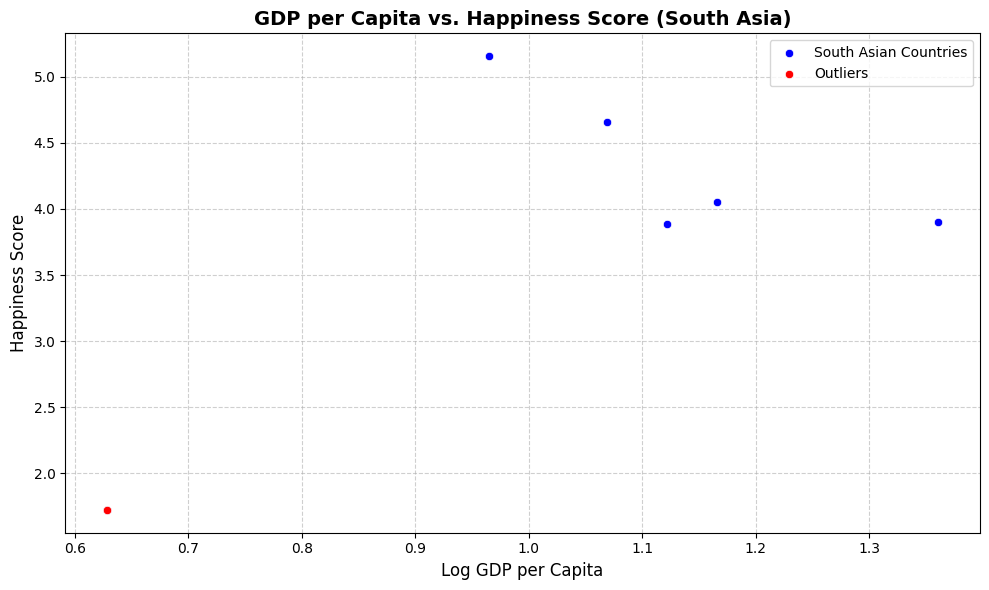

In [74]:
plt.figure(figsize=(10, 6))

# Plotting all South Asian countries
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, color='blue', label='South Asian Countries')

# Identifying and highlighting outliers
outliers = south_asia_df[
    (south_asia_df['score'] > upper_bound_score) | (south_asia_df['score'] < lower_bound_score) |
    (south_asia_df['Log GDP per capita'] > upper_bound_gdp) | (south_asia_df['Log GDP per capita'] < lower_bound_gdp)
]
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('GDP per Capita vs. Happiness Score (South Asia)', fontsize=14, fontweight='bold')
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Outliers in the data are characterized by exceptionally high or low values for happiness scores or GDP per capita compared to other countries in South Asia. Some of these outliers may involve a combination of both unusual happiness scores and GDP, creating data points that significantly deviate from the regional norms. These extreme values stand out from the rest of the data and can sometimes distort the overall picture of the region.

The presence of outliers can have a substantial impact on regional averages for both happiness and GDP. When extreme values are included in the calculations, they can skew these averages, making them less reflective of the typical experiences of countries in the region. In addition, outliers can obscure important underlying trends or relationships within the data, potentially leading to incorrect interpretations or missed insights.

To handle outliers effectively, it is important to investigate their causes and determine whether they reflect genuine differences or are the result of data anomalies. In cases where outliers are identified as influential, it may be helpful to use robust statistical measures, such as the median, which are less affected by extreme values. Depending on the analytical goals, one might choose to remove, transform, or adjust the data to minimize the impact of outliers, allowing for a more accurate and meaningful analysis of regional trends.

In [75]:
# Calculate the Pearson correlation between 'Freedom to make life choices', 'Generosity' and 'Score' for South Asian countries
correlation_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'], method='pearson')
correlation_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'], method='pearson')

print(f"Pearson correlation between Freedom to make life choices and Score: {correlation_freedom}")
print(f"Pearson correlation between Generosity and Score: {correlation_generosity}")

Pearson correlation between Freedom to make life choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


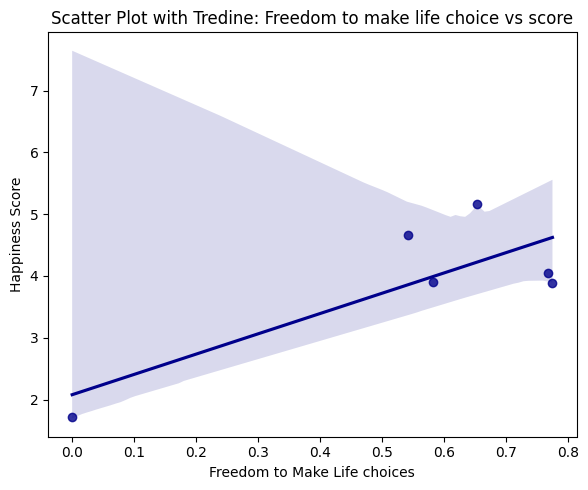

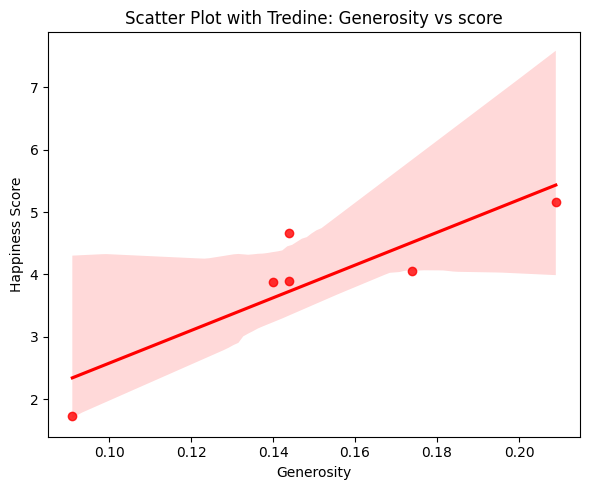

In [76]:
#no2
#Scatter plot

plt.figure(figsize=(6,5))
sns.regplot(x='Freedom to make life choices',y='score',data=south_asia_df,color='darkblue')
plt.title('Scatter Plot with Tredine: Freedom to make life choice vs score')
plt.xlabel('Freedom to Make Life choices')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.regplot(x='Generosity',y='score',data=south_asia_df,color='Red')
plt.title('Scatter Plot with Tredine: Generosity vs score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.tight_layout()

## Identifying Strongest and Weakest Relationships

#### Strongest Relationship:
The metric with the highest absolute correlation value with happiness scores indicates the strongest relationship. This means that changes in this metric are most closely associated with changes in happiness scores. For example, if the correlation value between "Freedom to make life choices" and happiness scores is higher than that of other metrics, it suggests that this factor plays a more significant role in driving happiness in South Asia.

#### Weakest Relationship:
Conversely, the metric with the lowest absolute correlation value represents the weakest relationship with happiness scores. This implies that changes in this metric have a lesser impact on happiness scores compared to other factors. For instance, if "Generosity" has a lower correlation value with happiness scores, it indicates that variations in generosity are less strongly associated with changes in happiness levels in South Asia.

### Discussion Based on Correlation Values:

- **If the correlation of "Freedom to make life choices" is higher (in absolute value) than "Generosity"**: This suggests that the perception of freedom in making life decisions is more strongly correlated with happiness scores in South Asia. The data would support the notion that people who feel more empowered in their choices tend to report higher happiness levels.
  
- **If the correlation of "Generosity" is higher (in absolute value) than "Freedom to make life choices"**: This would indicate that generosity plays a more significant role in happiness scores in South Asian countries, highlighting the importance of altruism or community support in determining well-being.

- **If both correlations are close to 0**: This would suggest that neither "Freedom to make life choices" nor "Generosity" has a strong linear relationship with happiness scores in the region. In this case, other factors might be more important or the relationship might be more complex than a simple linear correlation.

### Supporting Discussion with Scatter Plots:

Scatter plots with trendlines can further illustrate these relationships:

- **Stronger Relationship**: The scatter plot for the metric with the stronger relationship will typically show a more distinct trendline, with points clustering more closely around it. This indicates a clearer and more predictable pattern between the metric and happiness scores.
  
- **Weaker Relationship**: Conversely, the scatter plot for the metric with the weaker relationship may show a less defined trendline, with points scattered more widely. This suggests that the relationship is less pronounced, and the metric has a smaller effect on happiness scores.

### Example:

Let's say the correlation values are as follows:

- Correlation between happiness score and "Freedom to make life choices": 0.65
- Correlation between happiness score and "Generosity": 0.25

In this case, "Freedom to make life choices" has a stronger relationship with happiness scores (0.65) than "Generosity" (0.25). This would be visually supported by scatter plots: the plot for "Freedom to make life choices" would show a more defined upward trend, whereas the plot for "Generosity" might appear more scattered with a less noticeable trend.

### Conclusion:

By analyzing correlation values and scatter plots, we can identify the strongest and weakest relationships between various metrics and happiness scores in South Asia. This analysis provides valuable insights into the factors most strongly associated with happiness in the region. However, it's important to acknowledge the limitations of correlation analysis, as it does not account for the influence of other potential factors or the complexity of these relationships. Further exploration and more advanced analytical techniques may be necessary to uncover a fuller understanding.

In [77]:

# Calculate the 'GDP-Score Gap'
south_asia_df.loc[:,'GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Display the updated DataFrame
south_asia_df

<ipython-input-77-2c741e9f6d11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df.loc[:,'GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [78]:

# Sort by 'GDP-Score Gap' in ascending order
ascending_order = south_asia_df.sort_values(by='GDP-Score Gap')
print("Ascending Order:")
print(ascending_order[['Country name', 'GDP-Score Gap']])

# Sort by 'GDP-Score Gap' in descending order
descending_order = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
print("\nDescending Order:")
print(descending_order[['Country name', 'GDP-Score Gap']])

Ascending Order:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Descending Order:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


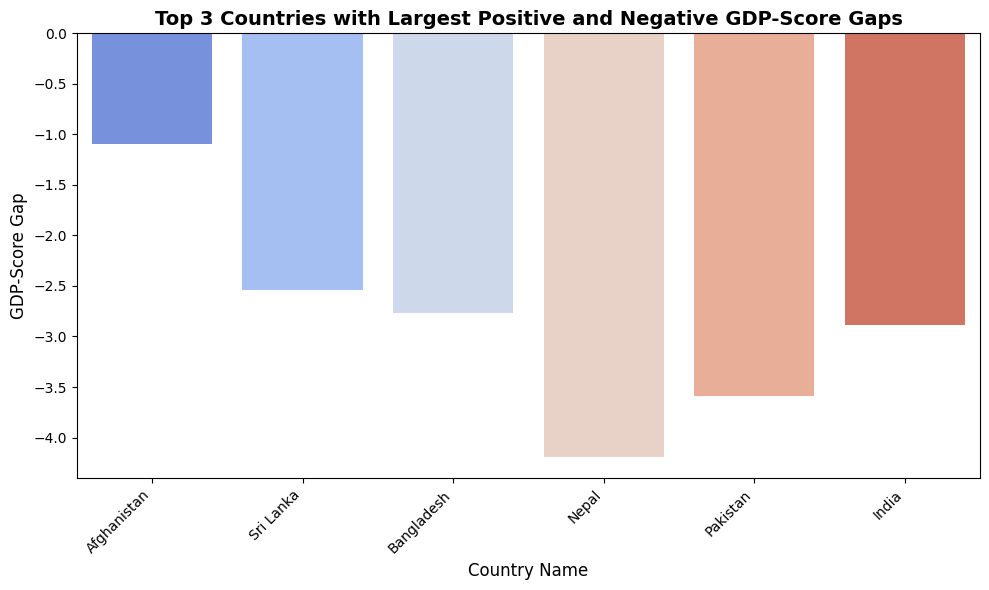

In [79]:
# Sort by 'GDP-Score Gap' to find the top 3 positive and negative gaps
top_3_positive = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False).head(3)
top_3_negative = south_asia_df.sort_values(by='GDP-Score Gap').head(3)

# Combine the data for plotting
top_6 = pd.concat([top_3_positive, top_3_negative])

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_6, hue='Country name', palette='coolwarm', legend=False)
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps', fontsize=14, fontweight='bold')
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Analyzing the Reasons Behind the GDP-Score Gap and Its Implications for South Asian Countries

The GDP-Score Gap refers to the difference between a country's economic performance (GDP per capita) and its overall happiness score. Several factors contribute to this gap, including non-economic, social, political, and cultural influences.

1. **Non-Economic Factors**: Happiness is influenced by more than just economic performance. Social support, healthy life expectancy, freedom to make life choices, and perceptions of corruption all significantly impact happiness levels. A country with a high GDP might still have a low happiness score if it lacks in these areas. For example, wealth without sufficient social services or personal freedoms may lead to a disconnect between economic prosperity and citizen well-being.

2. **Income Inequality**: In countries with high GDP per capita, significant income inequality can hinder overall happiness. If wealth is concentrated in the hands of a few, the majority of the population may experience low levels of well-being, reducing overall satisfaction despite the country's economic success. This inequality exacerbates social disparities and contributes to the happiness gap.

3. **Social and Political Factors**: Political instability, corruption, and social unrest can lower citizens' sense of well-being, even in economically prosperous countries. Nations with high GDP but poor governance or political conflict may have lower happiness scores due to insecurity and dissatisfaction with the political system.

4. **Cultural Factors**: Cultural norms and values shape how happiness is perceived and experienced. What constitutes happiness can vary across cultures, affecting how people in similarly developed countries report their happiness. In some regions, communal well-being may be prioritized over individual satisfaction, which could explain variations in happiness scores even among economically similar countries.

### Implications for South Asian Countries

The GDP-Score Gap has significant implications for policy and development strategies in South Asian countries:

1. **Policy Focus**: Governments should look beyond economic growth and aim to enhance other factors contributing to happiness, such as social support systems, healthcare, freedom, and education. Investing in these areas will improve citizens' overall well-being and help reduce the gap between economic performance and happiness.

2. **Sustainable Development**: South Asian countries should aim for sustainable development that balances economic growth with social and environmental considerations. A more holistic approach ensures that the benefits of growth are shared equitably and that future generations can continue to thrive, fostering long-term happiness.

3. **Addressing Inequality**: Reducing income inequality is essential for improving happiness. Policies that improve access to healthcare, education, and housing can bridge the gap between economic prosperity and happiness. Ensuring wealth distribution is more equitable can help create a society where all individuals can enjoy a higher quality of life.

4. **Good Governance**: Good governance is critical for fostering happiness. Political stability, transparency, and effective institutions are vital for creating a secure and empowering environment. In countries with high GDP but poor governance, efforts to improve political accountability, reduce corruption, and promote inclusivity can significantly enhance well-being.

### Conclusion

The gap between a country’s wealth and its happiness score is driven by a combination of economic, social, political, and cultural factors. South Asian countries must understand that economic growth alone does not guarantee happiness. By focusing on non-economic factors such as social support, reducing inequality, and ensuring good governance, they can create a more comprehensive approach to improving well-being. This approach will reduce the GDP-Score gap and lead to a more prosperous, fulfilling, and stable society for all citizens.

Problem 3 Comparitive Analysis

In [80]:
#creating the list of Middle Eastern Countries

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

middle_east_df=df[df['Country name'].isin(middle_east_countries)]

middle_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [81]:
#1
south_asian_mean=south_asia_df['score'].mean()
south_asian_std=south_asia_df['score'].std()

middle_east_mean=middle_east_df['score'].mean()
middle_east_std=middle_east_df['score'].std()

print(f"South Asian Mean Score: {south_asian_mean}, South Asian Standard Deviation: {south_asian_std}")
print(f"Middle East Mean Score: {middle_east_mean}, Middle East Standard Deviation: {middle_east_std}")
print("\n")

if south_asian_mean>middle_east_mean:
  print("South Asian countries have a higher mean score than Middle Eastern countries")
elif middle_east_mean>south_asian_mean:
  print("Middle Eastern countries have a higher mean score than South Asian countries")
else:
  print("Both regions have the same average happiness score")

South Asian Mean Score: 3.895666666666667, South Asian Standard Deviation: 1.1770690152521504
Middle East Mean Score: 5.412100000000001, Middle East Standard Deviation: 1.5662011684327144


Middle Eastern countries have a higher mean score than South Asian countries


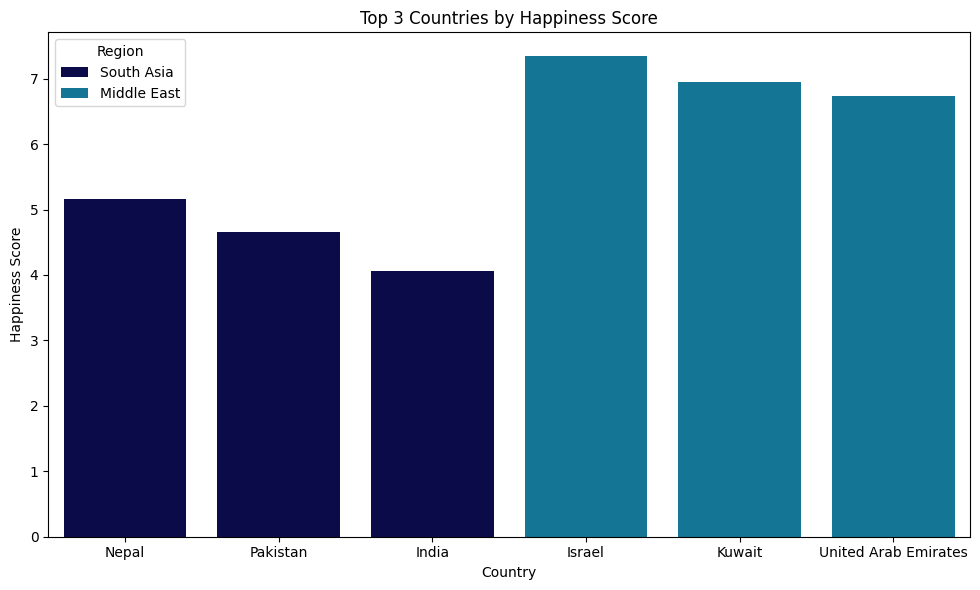

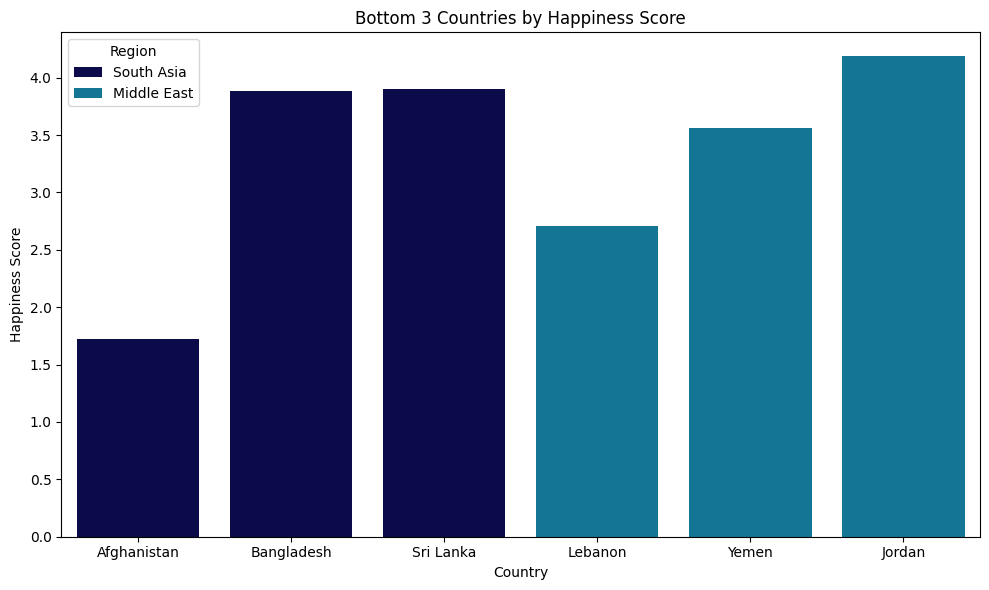

In [82]:
# Define a function to get top and bottom countries
def get_top_bottom(df, n=3):
    top_n = df.sort_values(by=['score'], ascending=False).head(n)
    bottom_n = df.sort_values(by=['score']).head(n)
    return top_n, bottom_n

# Get top and bottom 3 for South Asia and Middle East
south_asia_top3, south_asia_bottom3 = get_top_bottom(south_asia_df)
middle_east_top3, middle_east_bottom3 = get_top_bottom(middle_east_df)

# Combine data for visualization
def plot_happiness(top3, bottom3, title):
    combined_df = pd.concat(top3 + bottom3)
    combined_df['Region'] = ['South Asia'] * len(top3[0]) + ['Middle East'] * len(top3[1])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country name', y='score', hue='Region', data=combined_df, palette='ocean')
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel('Happiness Score')
    plt.tight_layout()
    plt.show()

# Plot top and bottom 3
plot_happiness([south_asia_top3, middle_east_top3], [], 'Top 3 Countries by Happiness Score')
plot_happiness([south_asia_bottom3, middle_east_bottom3], [], 'Bottom 3 Countries by Happiness Score')


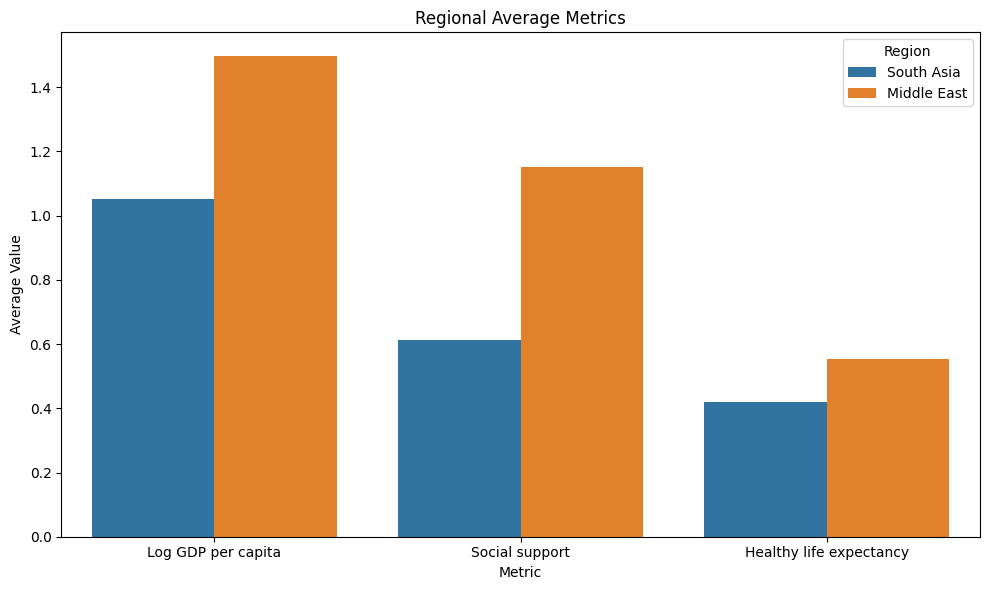



The metric with the largest disparity betwen the two region is: Social support


In [83]:
#3
regional_averages = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'Log GDP per capita': [south_asia_df['Log GDP per capita'].mean(), middle_east_df['Log GDP per capita'].mean()],
    'Social support': [south_asia_df['Social support'].mean(), middle_east_df['Social support'].mean()],
    'Healthy life expectancy': [south_asia_df['Healthy life expectancy'].mean(), middle_east_df['Healthy life expectancy'].mean()]
})

regional_averages_melted=regional_averages.melt(id_vars=['Region'],var_name='Metric',value_name='Average')

plt.figure(figsize=(10,6))
sns.barplot(x='Metric',y='Average',hue='Region',data=regional_averages_melted)
plt.title("Regional Average Metrics")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

disparity=regional_averages.set_index('Region').diff().abs().iloc[1]

largest_disparity_metric = disparity.idxmax()
print("\n")
print(f"The metric with the largest disparity betwen the two region is: {largest_disparity_metric}")

In [84]:
# Compute statistics for South Asia
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()

# Compute statistics for Middle East
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

# Compare ranges and CVs
print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")

if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29
South Asia has greater variability in happiness.


In [85]:
# South Asia
south_asia_freedom_corr = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
south_asia_generosity_corr = south_asia_df['score'].corr(south_asia_df['Generosity'])

print(f"South Asia - Correlation with Freedom: {south_asia_freedom_corr:.2f}, Correlation with Generosity: {south_asia_generosity_corr:.2f}")

# Middle East
middle_east_freedom_corr = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
middle_east_generosity_corr = middle_east_df['score'].corr(middle_east_df['Generosity'])

print(f"Middle East - Correlation with Freedom: {middle_east_freedom_corr:.2f}, Correlation with Generosity: {middle_east_generosity_corr:.2f}")


South Asia - Correlation with Freedom: 0.80, Correlation with Generosity: 0.87
Middle East - Correlation with Freedom: 0.86, Correlation with Generosity: 0.63


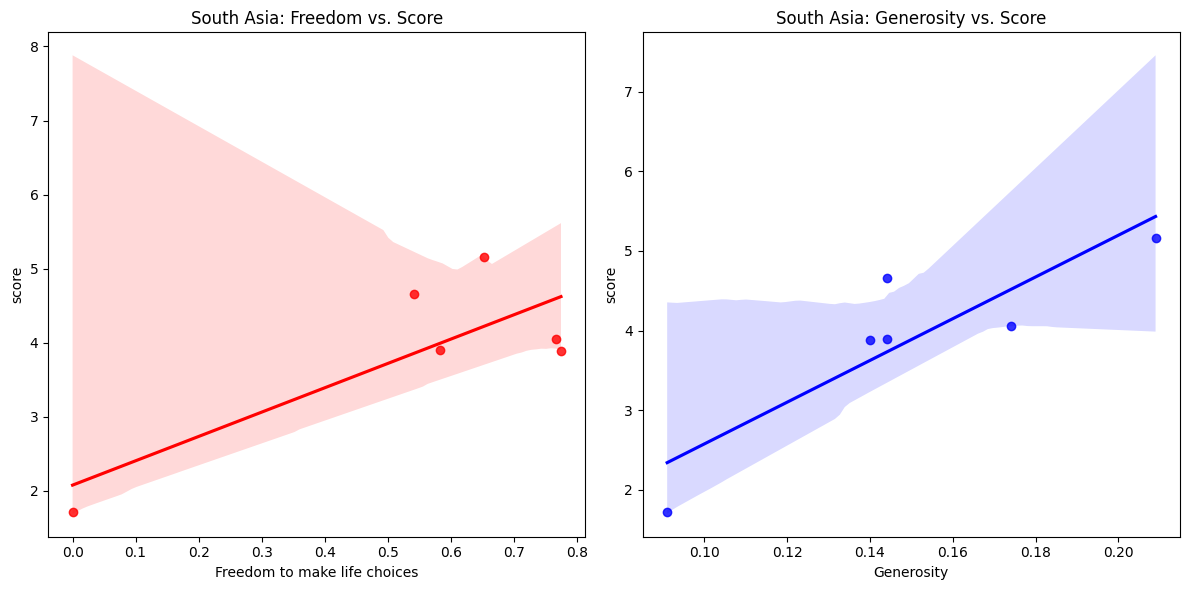

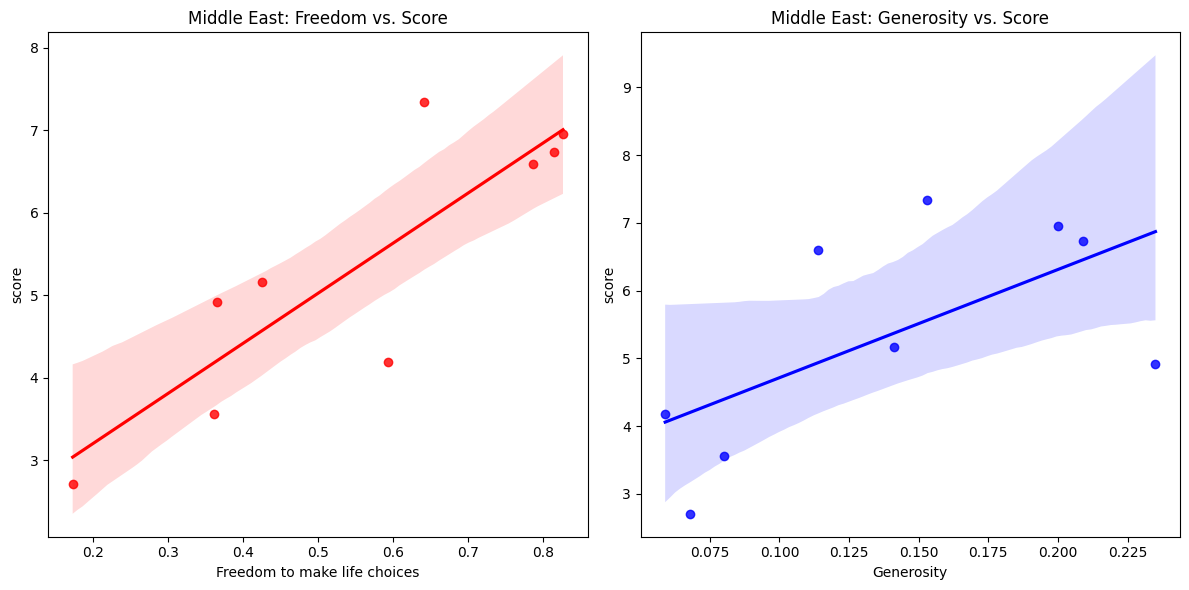

In [86]:
# South Asia
plt.figure(figsize=(12, 6))

# Plot for Freedom to Make Life Choices vs Happiness Score
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='red')
plt.title('South Asia: Freedom vs. Score')

# Plot for Generosity vs Happiness Score
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, color='blue')
plt.title('South Asia: Generosity vs. Score')

plt.tight_layout()
plt.show()

# Middle East
plt.figure(figsize=(12, 6))

# Plot for Freedom to Make Life Choices vs Happiness Score
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, color='red')
plt.title('Middle East: Freedom vs. Score')

# Plot for Generosity vs Happiness Score
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=middle_east_df, color='blue')
plt.title('Middle East: Generosity vs. Score')

plt.tight_layout()
plt.show()


### Interpreting the Scatter Plots:

**South Asia:**

- **Freedom vs. Score**: The scatter plot for "Freedom to make life choices" shows an upward trend, indicating a positive correlation with happiness. The regression line slopes upwards, suggesting that greater freedom is linked to higher happiness.
  
- **Generosity vs. Score**: The points for "Generosity" are more scattered, showing a weaker correlation with happiness. The regression line is less defined, indicating that generosity has little impact on happiness in this region.

**Middle East:**

- **Freedom vs. Score**: The upward trend is less pronounced compared to South Asia, showing a moderate positive correlation between freedom and happiness.

- **Generosity vs. Score**: The points are scattered, with no clear trend, indicating a very weak or no relationship between generosity and happiness in the Middle East.

### Overall Interpretation:

The scatter plots reveal that in both regions, freedom is positively correlated with happiness, though the relationship is stronger in South Asia. Generosity shows a weaker or no correlation in both regions. These visual trends confirm the findings from the correlation analysis.

In [87]:
# Function to identify outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers in South Asia
south_asia_score_outliers = find_outliers_iqr(south_asia_df, 'score')
south_asia_gdp_outliers = find_outliers_iqr(south_asia_df, 'Log GDP per capita')

# Identify outliers in Middle East
middle_east_score_outliers = find_outliers_iqr(middle_east_df, 'score')
middle_east_gdp_outliers = find_outliers_iqr(middle_east_df, 'Log GDP per capita')

# Print the outlier countries
print("Outlier Countries in South Asia based on Score:")
print(south_asia_score_outliers[['Country name', 'score']])
print("\nOutlier Countries in South Asia based on Log GDP per capita:")
print(south_asia_gdp_outliers[['Country name', 'Log GDP per capita']])
print("\nOutlier Countries in Middle East based on Score:")
print(middle_east_score_outliers[['Country name', 'score']])
print("\nOutlier Countries in Middle East based on Log GDP per capita:")
print(middle_east_gdp_outliers[['Country name', 'Log GDP per capita']])

Outlier Countries in South Asia based on Score:
    Country name  score
142  Afghanistan  1.721

Outlier Countries in South Asia based on Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Outlier Countries in Middle East based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Outlier Countries in Middle East based on Log GDP per capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


In [88]:
# Function to identify outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers in South Asia
south_asia_score_outliers = find_outliers_iqr(south_asia_df, 'score')
south_asia_gdp_outliers = find_outliers_iqr(south_asia_df, 'Log GDP per capita')

# Identify outliers in Middle East
middle_east_score_outliers = find_outliers_iqr(middle_east_df, 'score')
middle_east_gdp_outliers = find_outliers_iqr(middle_east_df, 'Log GDP per capita')

# Print the outlier countries
print("Outlier Countries in South Asia based on Score:")
print(south_asia_score_outliers[['Country name', 'score']])
print("\nOutlier Countries in South Asia based on Log GDP per capita:")
print(south_asia_gdp_outliers[['Country name', 'Log GDP per capita']])
print("\nOutlier Countries in Middle East based on Score:")
print(middle_east_score_outliers[['Country name', 'score']])
print("\nOutlier Countries in Middle East based on Log GDP per capita:")
print(middle_east_gdp_outliers[['Country name', 'Log GDP per capita']])

Outlier Countries in South Asia based on Score:
    Country name  score
142  Afghanistan  1.721

Outlier Countries in South Asia based on Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Outlier Countries in Middle East based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Outlier Countries in Middle East based on Log GDP per capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


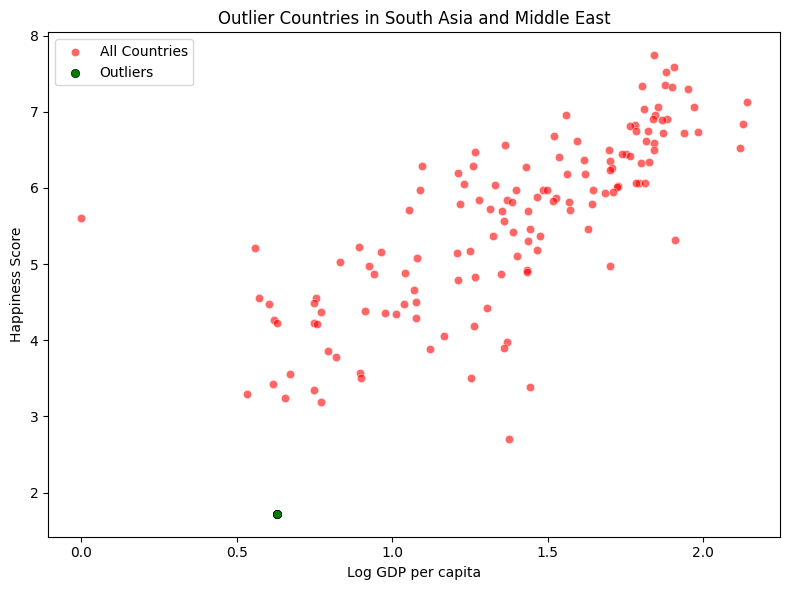

In [89]:
all_outliers = pd.concat([south_asia_score_outliers, south_asia_gdp_outliers,
                          middle_east_score_outliers, middle_east_gdp_outliers])

# Create scatter plot of all countries and highlight outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='red', label='All Countries', alpha=0.6)
sns.scatterplot(x='Log GDP per capita', y='score', data=all_outliers, color='green', label='Outliers', edgecolor='black')
plt.title("Outlier Countries in South Asia and Middle East")
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

### Discussion of Implications:

- **Unique Factors**: Outliers may have distinct social, economic, or political factors that influence their happiness levels in ways that differ from other countries in the region. These unique factors could include political stability, social support systems, levels of corruption, or cultural values that set these countries apart from others.

- **Policy Considerations**: Identifying outliers helps policymakers target specific countries that are either performing unusually well or poorly in terms of happiness. By understanding the underlying reasons for their happiness scores, policymakers can implement focused interventions to improve well-being in these countries, such as improving governance, healthcare, or social support systems.

- **Regional Averages**: Outliers can significantly impact regional averages, potentially distorting overall trends in happiness. This makes it crucial to consider these outliers when interpreting regional averages, as they may not accurately reflect the experiences of the majority of countries in the region.

- **Further Investigation**: Outliers often warrant closer investigation to better understand their context. A deeper dive into the specific factors contributing to their position can provide valuable insights into what drives happiness in those countries, which could be beneficial for developing policies or strategies that can be applied more broadly.

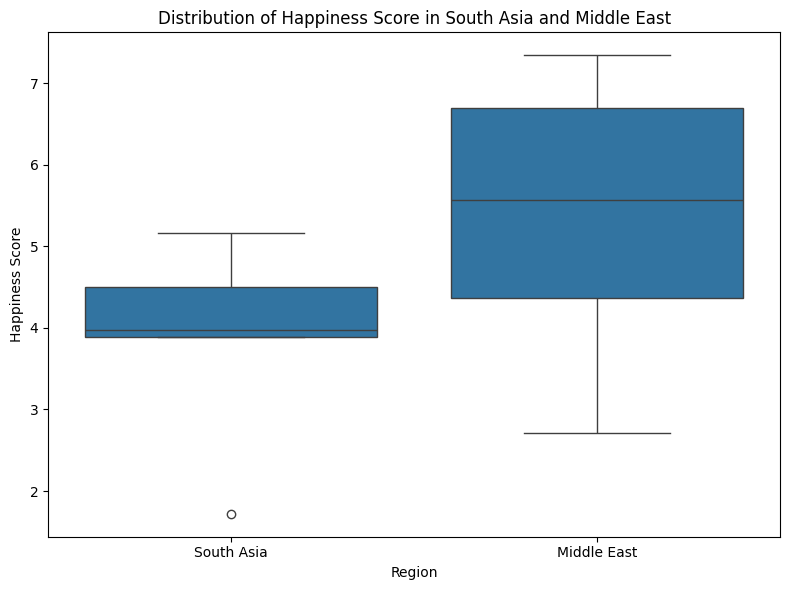

In [90]:
plt.figure(figsize=(8,6))

# Ensure 'Region' and 'score' columns exist in both dataframes and are named consistently
sns.boxplot(x='Region', y='score', data=pd.concat([south_asia_df.assign(Region='South Asia'),
                                                   middle_east_df.assign(Region='Middle East')]))

plt.title('Distribution of Happiness Score in South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

### Interpretation of Key Differences:

- **Distribution Shapes:**
  - **Symmetry/Skewness**: By examining the boxplots, the symmetry or skewness of the distributions can be assessed. If the box is roughly symmetrical with whiskers of equal length, the distribution is symmetrical. A skew towards one side, indicated by a longer whisker, shows that the distribution is not symmetrical. For instance, if the boxplot for South Asia shows a longer whisker towards the lower scores, it suggests a right-skewed distribution, indicating that more countries have lower happiness scores.

- **Medians:**
  - **Central Tendency**: The horizontal line inside the box represents the median, indicating the typical value in the dataset. Comparing the medians of the two boxplots helps determine which region has a higher or lower typical happiness score. If the median of the Middle East boxplot is higher than that of South Asia, it shows that the typical happiness score in the Middle East is higher.

- **Outliers:**
  - **Extreme Values**: Points outside the whiskers are considered outliers, representing countries with extremely high or low happiness scores compared to the majority. In South Asia, if there are outliers with very low happiness scores, it suggests that certain countries are performing much worse in terms of happiness. In contrast, if the Middle East boxplot shows no outliers, it indicates that happiness scores in the region are more consistent and less extreme.